In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#Load the data from the turboaz.csv file
source = pd.read_csv(r'C:\Users\ASUS\Desktop\python\turboaz.csv',
                   usecols=['Yurush', 'Buraxilish ili', 'Qiymet'])

print(source)

      Buraxilish ili      Yurush     Qiymet
0               1999  366 000 km  12500 AZN
1               2014  102 000 km    31500 $
2               2002  469 700 km  11700 AZN
3               1998  556 680 km   9700 AZN
4               2000  300 000 km  12700 AZN
...              ...         ...        ...
1323            1996  325 000 km   8800 AZN
1324            1994  280 000 km   6300 AZN
1325            1998  272 000 km  10900 AZN
1326            2000  207 000 km  11300 AZN
1327            1996  255 700 km  10500 AZN

[1328 rows x 3 columns]


In [60]:
price = source['Qiymet'].map(lambda x: float(
    x.rstrip('$')) * 1.7 if '$' in x else float(x.rstrip('AZN')))
distanceTravelled = source['Yurush'].map(
    lambda x: x.rstrip('km').replace(' ', '')).map(int)
year = source['Buraxilish ili']

price_old= price
distance_old=distanceTravelled
year_old=year

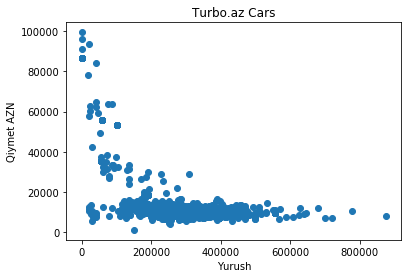

In [61]:
#Visualization Part 1
plt.scatter(distanceTravelled, price)
plt.ylabel('Qiymet AZN')
plt.xlabel('Yurush')
plt.title('Turbo.az Cars')
plt.show()

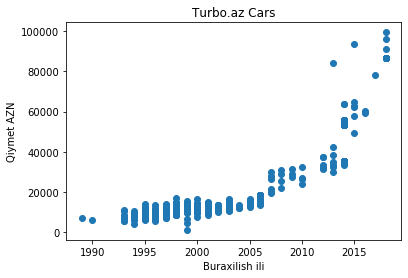

In [46]:
#Visualization Part 1
plt.scatter(year, price)
plt.xlabel('Buraxilish ili')
plt.ylabel('Qiymet AZN')
plt.title('Turbo.az Cars')
plt.show()

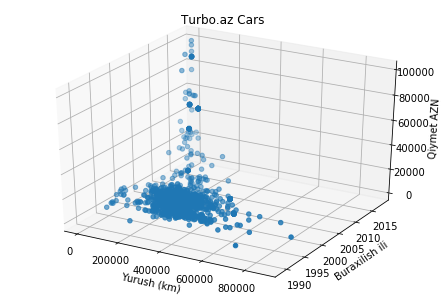

In [62]:
#Visualization Part 1
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(distanceTravelled, year, price)
ax.set_xlabel('Yurush (km)')
ax.set_ylabel('Buraxilish ili')
ax.set_zlabel('Qiymet AZN')
ax.set_title('Turbo.az Cars')
plt.show()

In [63]:
#Normalization of Data
distanceTravelled = (distanceTravelled-distanceTravelled.mean())/distanceTravelled.std()
year = (year-year.mean())/year.std()
price = (price-price.mean())/price.std()
n= len(distanceTravelled)
x0=np.ones(n)
X=np.array([x0,distanceTravelled,year]).T
beta=np.array([2,3,0])
alfa = 0.001
#Cost Function
def cost_function(X,Y,B):
    m=len(Y)
    #hypothesis
    h=X.dot(B)
    loss=h-Y
    error_sq= (loss**2)
    J= np.sum(error_sq)
    return J /(2*m)
print(cost_function(X,price,beta))

init_cost = cost_function(X,price,beta)

8.697154397235645


In [64]:
# Gradient Descent Function 
def gradient_descent(X,Y,B, alfa, iters):
    cost_history = [0]*iters #new array with lenght "iterations" full of 0s
    m=len(Y)
    for iterr in range (iters):
        if iterr % 1000==0:
            print("Iteration #%d" % iterr)
            print(cost_function(X,Y,B))
    #hypothesis 
        h=X.dot(B)
        loss= h-Y
        grad = X.T.dot(loss) /m

        B= B-alfa* grad
        cost=cost_function(X,Y,B)
        cost_history[iterr] = cost
    return B, cost_history

new_theta, cost_history = gradient_descent(X,price,beta,alfa,10000)


Iteration #0
8.697154397235645
Iteration #1000
0.8704783800615864
Iteration #2000
0.2526359191305009
Iteration #3000
0.15338168740704683
Iteration #4000
0.1245516942287373
Iteration #5000
0.11374417008486284
Iteration #6000
0.10933810891246132
Iteration #7000
0.10749357506692568
Iteration #8000
0.10671487112488542
Iteration #9000
0.10638524652761919


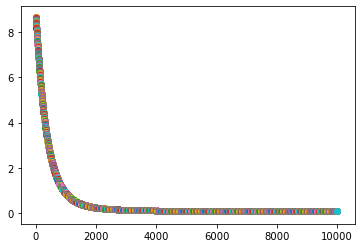

In [55]:
#Visualization Part 2 (Cost at each Iteration)
for i in range(10000):
    plt.scatter(i,cost_history[i])
plt.show()

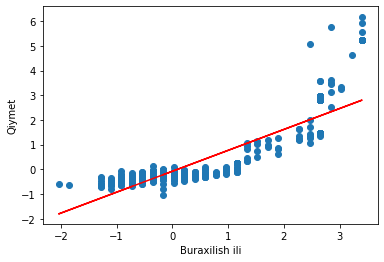

In [65]:
#Prediction lines
plt.figure()
plt.scatter(year, price)
plt.xlabel("Buraxilish ili")
plt.ylabel("Qiymet")
prediction = new_theta[2]*year  + new_theta[1]
plt.plot(year, prediction, 'r')
plt.show()


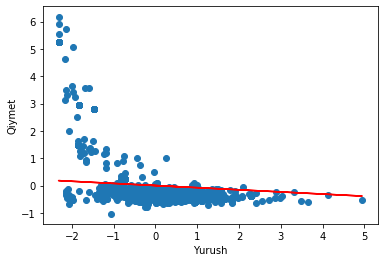

In [66]:
#Predtiction Lines
plt.figure()
plt.scatter(distanceTravelled, price)
plt.xlabel("Yurush")
plt.ylabel("Qiymet")
prediction = new_theta[1]*distanceTravelled + new_theta[0]
plt.plot(distanceTravelled, prediction, 'r')
plt.show()

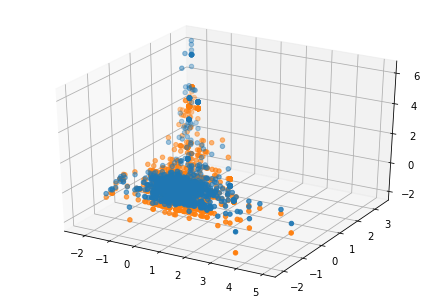

In [76]:
# Orange points represent predicted values
ax = Axes3D(plt.figure())
ax.scatter(distanceTravelled, year, price)
pred=new_theta[2]*year + new_theta[1]*distanceTravelled + new_theta[0]
ax.scatter(distanceTravelled, year, pred, 'r')

In [73]:
#Testing 1
distance_1 = 240000
year_1 = 2000
actual_price_1 = 11500

distance_1 = (distance_1 - distance_old.mean()) / distance_old.std()
year_1 = (year_1 - year_old.mean()) / year_old.std()
actual_price_1 = (actual_price_1 - price_old.mean()) / price_old.std()
predcition_1 = new_theta[2] * year_1 + new_theta[1] * distance_1 + new_theta[0]

pred1= predcition_1*price_old.std() + price_old.mean()
ap1 = actual_price_1*price_old.std() + price_old.mean()
print(pred1, ' ', ap1)

15757.665198135957   11500.0


In [74]:
#Testing 2
distance_2 = 415558
year_2 = 1996
actual_price_2 = 8800

distance_2 = (distance_2 - distance_old.mean()) / distance_old.std()
year_2 = (year_2 - year_old.mean()) / year_old.std()
actual_price_2 = (actual_price_2 - price_old.mean()) / price_old.std()
predcition_2 = new_theta[2] * year_2 + new_theta[1] * distance_2 + new_theta[0]

pred2= predcition_2 * price_old.std() + price_old.mean()
ap2 = actual_price_2 * price_old.std() + price_old.mean()
print(pred2, ' ', ap2)

5539.695576839145   8800.0
